In [76]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [77]:
def map_range(value, min, max):
        return ((value-np.min(value))/(np.max(value)-np.min(value))) * (max - min)

In [78]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 1000 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 0.2

Nsymbols = 2 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

# Genera una secuencia de símbolos basados en las probabilidades dadas
#data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data = np.array([a0, a1])

# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message_org = data  # Almacena la secuencia completa en la variable 'message'

o2 = 1

noise = np.random.normal(0, o2, N)

message_corrupt  = message_org + noise*amp_noise


message_corrupt = message_corrupt.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada
message_org = message_org.reshape(-1, 1)   

message_corrupt = map_range(message_corrupt, 0, 1)
message_org = map_range(message_org, 0, 1)

In [79]:
# Generar datos de ejemplo
num_muestras = 1000
# Supongamos que 'secuencia_original' es un array con tus datos binarios originales (0s y 1s)
secuencia_original = np.random.randint(0, 2, num_muestras)
ruido = np.random.normal(0, 1, num_muestras)*0.1  # Ruido blanco
datos = secuencia_original + ruido  # Añadir ruido a los datos
datos = datos.reshape(-1, 1)  # Redimensionar para que sea un array 2D
etiquetas = secuencia_original.reshape(-1, 1)  # Las etiquetas son los valores binarios originales

# Crear el modelo
modelo = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  # Capa oculta con 64 neuronas
    #layers.Dense(30, activation='relu'),  # Salida con una sola neurona
    #layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide
])

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
historial=modelo.fit(message_org, message_corrupt, epochs=100, batch_size=32)

# Aquí puedes usar modelo.predict() para hacer predicciones con nuevos datos


Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 0.6626 - accuracy: 0.0010
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.0010
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.0010
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.0010
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.0010
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.0010
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.0010
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.0010
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.0010
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.0010
Epoch 11/

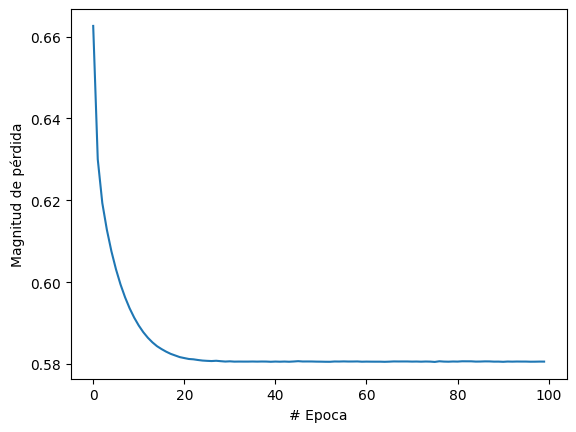

In [80]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

625/625 [==============================] - 1s 2ms/step
[0.04587143]
Original: 0 - Reconstruida: [0.04587143]
Original: 0 - Reconstruida: [0.11120015]
Original: 0 - Reconstruida: [0.0457687]
Original: 0 - Reconstruida: [0.00100631]
Original: 0 - Reconstruida: [0.00137208]
Original: 0 - Reconstruida: [0.00136832]
Original: 1 - Reconstruida: [0.6767835]
Original: 0 - Reconstruida: [0.20698467]
Original: 0 - Reconstruida: [0.02338712]
Original: 1 - Reconstruida: [0.31176922]
Original: 0 - Reconstruida: [0.02478888]
Original: 1 - Reconstruida: [0.4561149]
Original: 0 - Reconstruida: [0.00121063]
Original: 0 - Reconstruida: [0.07417405]
Original: 1 - Reconstruida: [0.5253354]
Original: 1 - Reconstruida: [0.40924302]
Original: 1 - Reconstruida: [0.56591314]
Original: 0 - Reconstruida: [0.0008011]
Original: 1 - Reconstruida: [0.42357272]
Original: 1 - Reconstruida: [0.50760293]


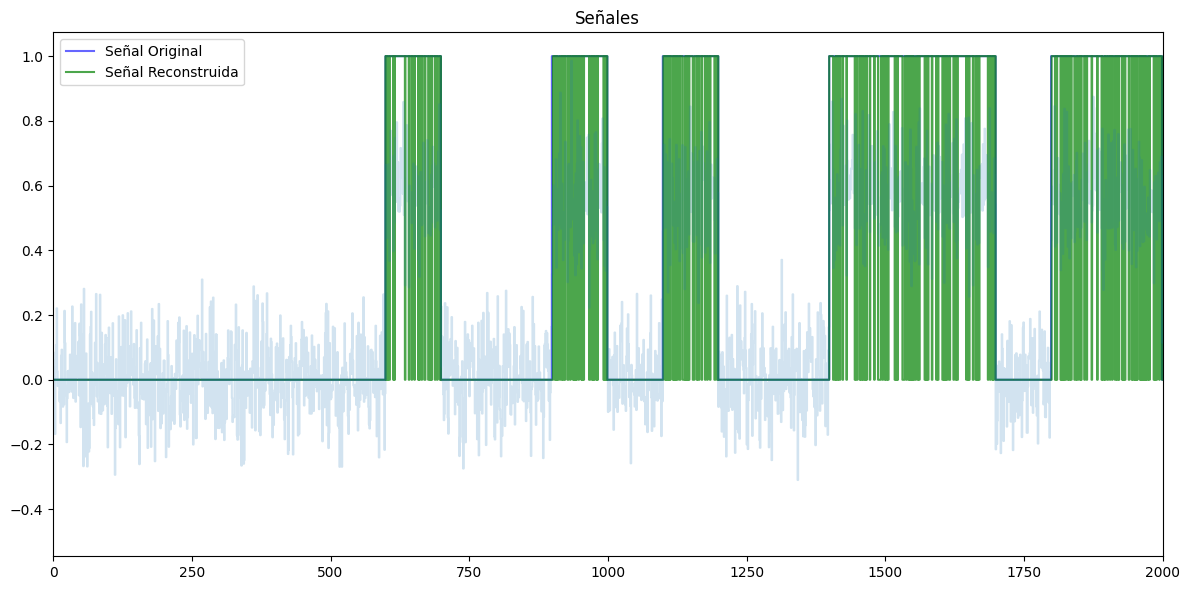

In [81]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 100 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 0.2

Nsymbols = 200 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data_test = np.concatenate([[v]*Nsamples for v in data_test])


message_test = data_test
noise_test = np.random.normal(0, o2, N)
message_corrupt_test  = message_test + noise_test*amp_noise
message_corrupt_test = message_corrupt_test.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada

message_corrupt_test = map(message_corrupt_test,0,1)

message_predict = modelo.predict(message_corrupt_test)
message_predict = map_range(message_predict,0,1)
#message_predict_ = message_predict.reshape(1, -1)[0]


print(message_predict[0])

#print(max(message_predict_))

for i in range(0,2000,100):
    print(f"Original: {message_test[i]} - Reconstruida: {message_predict[i]}")

# Predecir y aplicar umbral
umbral = 0.2
#values = [-1.5,-0.5]
#message_predict = [values[np.argmax(dato)] for dato in message_predict]
#message_predict = [1 if dato > umbral else 0 for dato in message_predict]
message_predict = (message_predict > 0.5).astype(int)

plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_predict, '-g',label='Señal Reconstruida', alpha=0.7)
plt.step(time,message_corrupt_test, alpha=0.2)
plt.xlim(0,int(N)/10)
plt.title(f'Señales')
plt.legend()
plt.show()